# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1baaac96c18f3b2415afb60671478d5a'

In [10]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')


for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print('-------------------------')
print('Data Retrieval Completed!!!')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of Set 1 | asau
Processing record 2 of Set 1 | sisimiut
Processing record 3 of Set 1 | hermanus
Processing record 4 of Set 1 | san quintin
Processing record 5 of Set 1 | punta arenas
Processing record 6 of Set 1 | tiksi
Record not found
Processing record 7 of Set 1 | longyearbyen
Processing record 8 of Set 1 | te anau
Processing record 9 of Set 1 | sao felix do xingu
Processing record 10 of Set 1 | tilichiki
Processing record 11 of Set 1 | aberdeen
Processing record 12 of Set 1 | poum
Processing record 13 of Set 1 | puerto rico
Processing record 14 of Set 1 | rikitea
Processing record 15 of Set 1 | barrow
Processing record 16 of Set 1 | ambon
Processing record 17 of Set 1 | bestobe
Processing record 18 of Set 1 | busselton
Processing record 19 of Set 1 | yumen
Processing record 20 of Set 1 | palimbang
Processing record 21 of Set 1 | chuy
Processing record 22 of Set 1 | cherskiy
Processing rec

Processing record 186 of Set 1 | avera
Processing record 187 of Set 1 | batticaloa
Processing record 188 of Set 1 | fort nelson
Processing record 189 of Set 1 | hasaki
Processing record 190 of Set 1 | atuona
Record not found
Processing record 191 of Set 1 | tyup
Processing record 192 of Set 1 | isangel
Processing record 193 of Set 1 | bilibino
Processing record 194 of Set 1 | vila velha
Processing record 195 of Set 1 | chicama
Processing record 196 of Set 1 | sorland
Processing record 197 of Set 1 | rantepao
Processing record 198 of Set 1 | fare
Processing record 199 of Set 1 | mackenzie
Processing record 200 of Set 1 | jutai
Record not found
Processing record 201 of Set 1 | ilek
Processing record 202 of Set 1 | aswan
Processing record 203 of Set 1 | saint-francois
Processing record 204 of Set 1 | vardo
Processing record 205 of Set 1 | krasnoyarskiy
Processing record 206 of Set 1 | la palma
Processing record 207 of Set 1 | faya
Processing record 208 of Set 1 | syracuse
Processing recor

Processing record 377 of Set 1 | pisco
Processing record 378 of Set 1 | jega
Processing record 379 of Set 1 | yuci
Processing record 380 of Set 1 | aksarka
Processing record 381 of Set 1 | ketchikan
Processing record 382 of Set 1 | passo de camaragibe
Processing record 383 of Set 1 | fayaoue
Record not found
Processing record 384 of Set 1 | manaure
Processing record 385 of Set 1 | portage
Processing record 386 of Set 1 | krasnoselkup
Processing record 387 of Set 1 | kutum
Processing record 388 of Set 1 | treinta y tres
Processing record 389 of Set 1 | polunochnoye
Processing record 390 of Set 1 | darhan
Processing record 391 of Set 1 | tomari
Processing record 392 of Set 1 | meadow lake
Processing record 393 of Set 1 | umm lajj
Processing record 394 of Set 1 | kahului
Processing record 395 of Set 1 | hamza
Processing record 396 of Set 1 | sao jose da coroa grande
Processing record 397 of Set 1 | ndele
Processing record 398 of Set 1 | hofn
Processing record 399 of Set 1 | hamilton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    "City": cityname,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp": max_temp,
    "Wind Speed" : wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [13]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Asău,8,RO,1585861200,67,46.4333,26.4000,37.31,4.45
1,Sisimiut,5,GL,1585861200,85,66.9395,-53.6735,7.23,10.31
2,Hermanus,0,ZA,1585861200,73,-34.4187,19.2345,65.88,10.76
3,San Quintín,0,MX,1585861200,65,30.4833,-115.9500,63.79,16.62
4,Punta Arenas,100,CL,1585861200,66,-53.1500,-70.9167,58.06,22.44


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

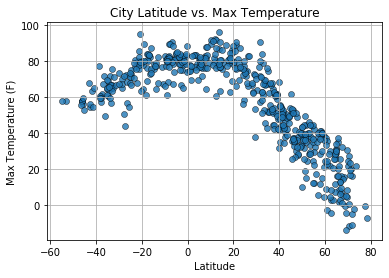

In [33]:

plt.scatter(lat, 
            max_temp,
            edgecolor="black", linewidths=0.5, marker="o", 
            alpha=0.8, label="Cities")
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

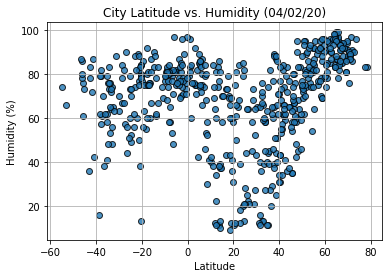

In [32]:
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

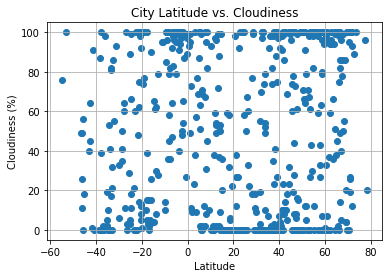

In [34]:
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

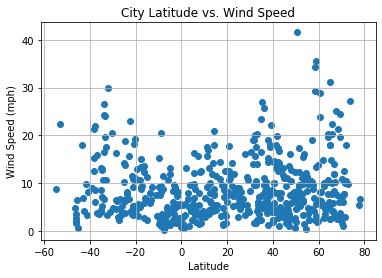

In [36]:
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.grid(True)
plt.show()

## Linear Regression

In [50]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames

northlat_df = weather_data.loc[weather_data["Lat"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Lat"] < 0,:]

northlat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Asău,8,RO,1585861200,67,46.4333,26.4000,37.31,4.45
1,Sisimiut,5,GL,1585861200,85,66.9395,-53.6735,7.23,10.31
3,San Quintín,0,MX,1585861200,65,30.4833,-115.9500,63.79,16.62
5,Tiksi,93,RU,1585861200,90,71.6872,128.8694,-4.90,2.91
6,Longyearbyen,20,SJ,1585861200,83,78.2186,15.6401,-7.28,6.80


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9082452406568694


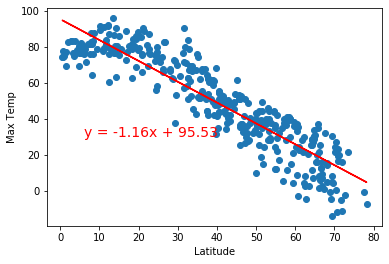

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = northlat_df["Lat"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7135974316450585


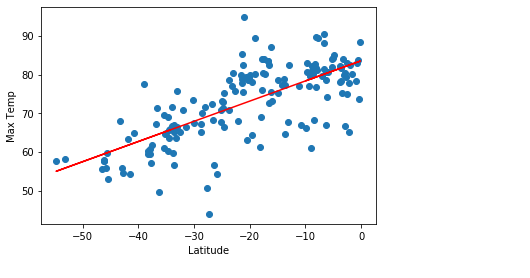

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [49]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


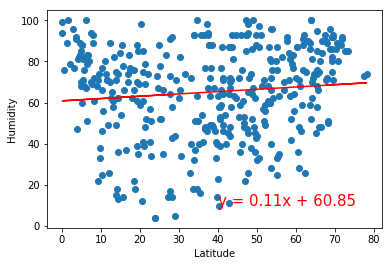

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.458690468100629


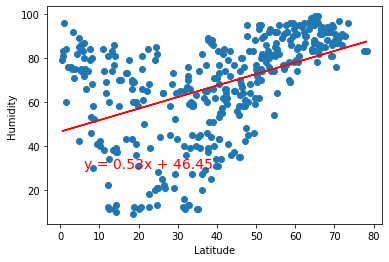

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = northlat_df["Lat"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28404551019400465


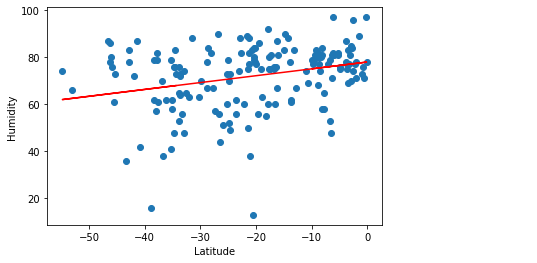

<Figure size 432x288 with 0 Axes>

In [61]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1901240881831813


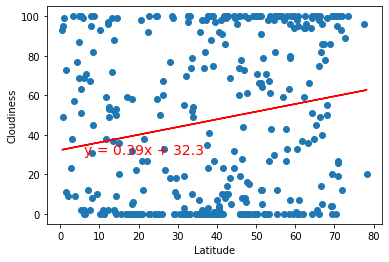

<Figure size 432x288 with 0 Axes>

In [62]:
x_values = northlat_df["Lat"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1421905701925279


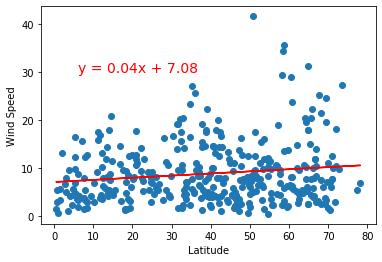

<Figure size 432x288 with 0 Axes>

In [63]:
x_values = northlat_df["Lat"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29605303712293096


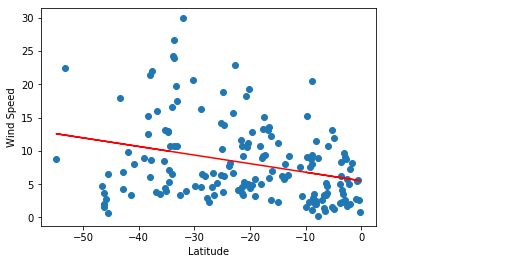

<Figure size 432x288 with 0 Axes>

In [67]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')